In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('Price.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])

scaler = MinMaxScaler()
df[['value']]= scaler.fit_transform(df[['value']])

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-05-31')
df = df[(df['timestamp']>= start_date) & (df['timestamp'] <= end_date)]
df = df.sort_values('timestamp', ascending=True)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Timestamp('2020-10-17 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-03 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-05 00:00:00'), Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-07 00:00:00'), Timestamp('2020-11-08 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2020-11-12 00:00:00'), Timestamp('2020-11-13 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-15 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-11-18 00:00:00'), Timestamp('2020-11-19 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-11-24 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-26 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-11-28 00:00:00'), Timestamp('20

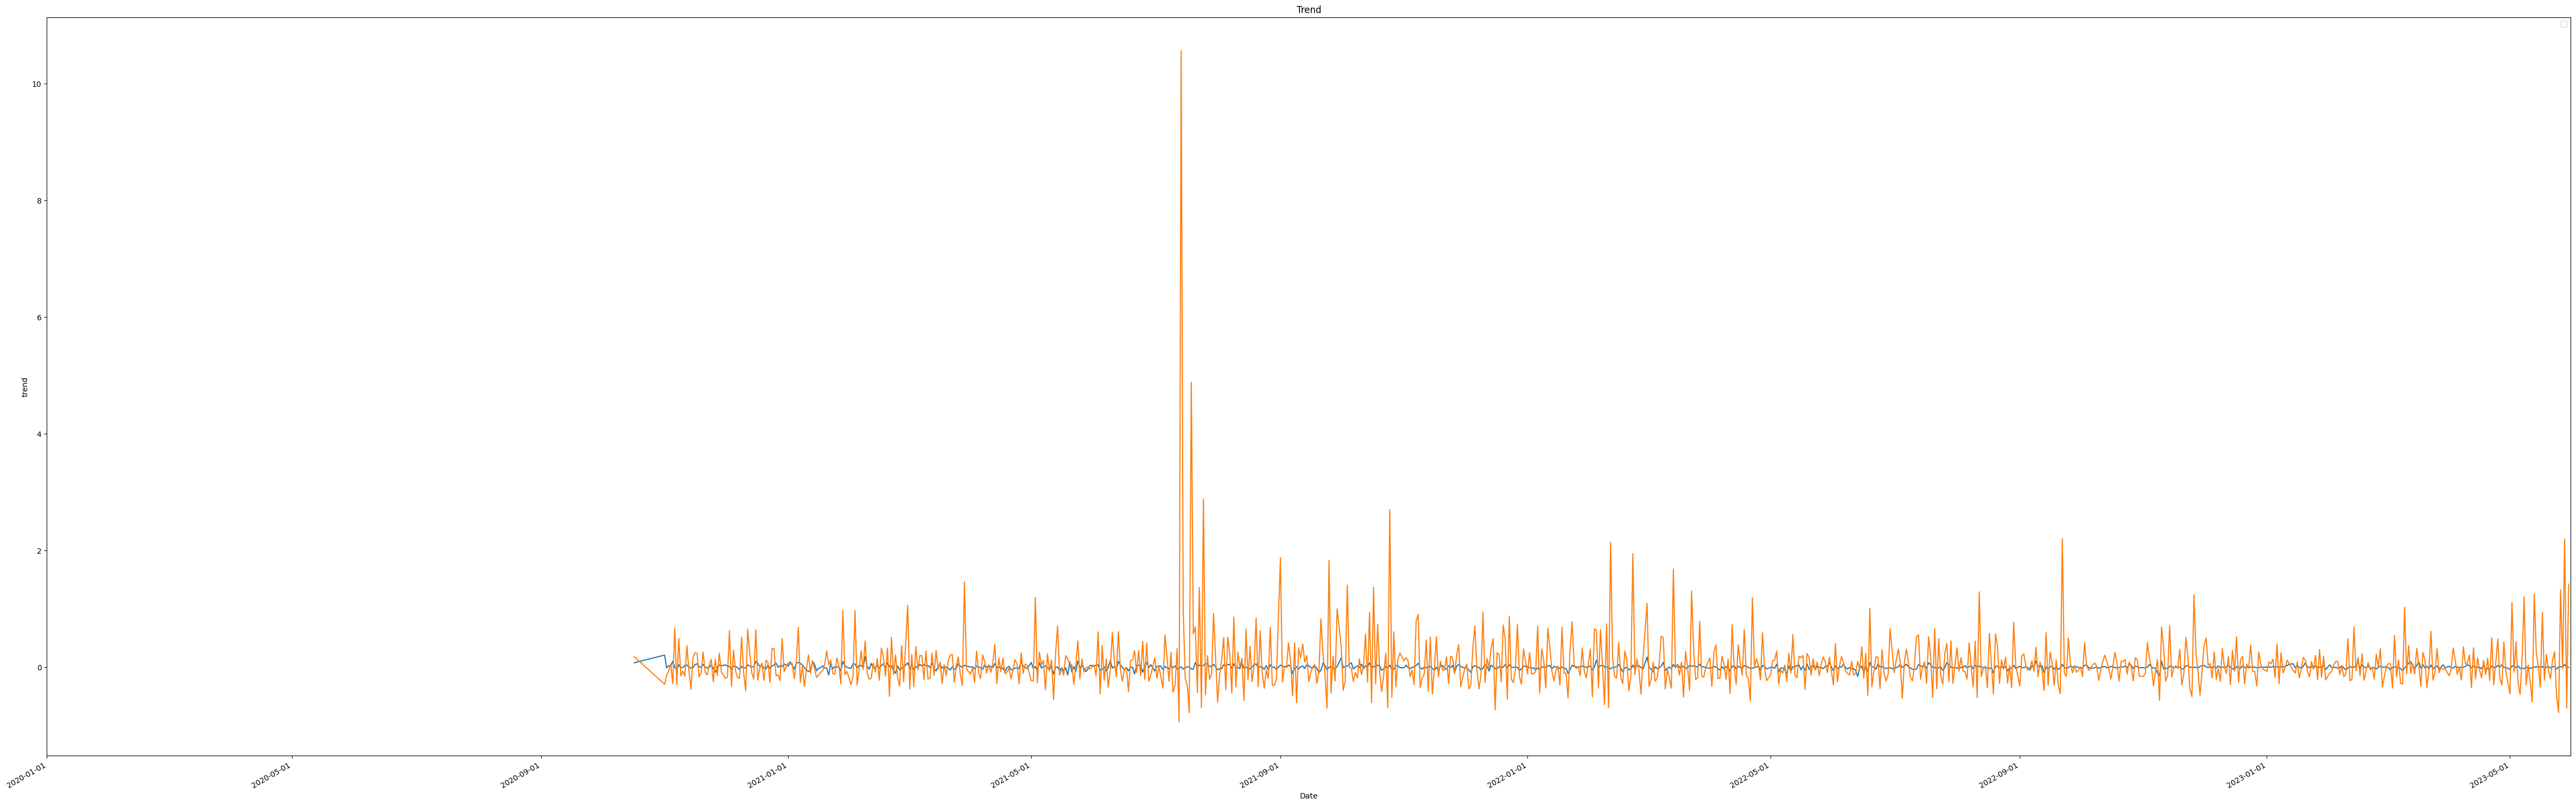

In [232]:
START = '2021-01-01'
END = '2023-05-31'



import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sentiment = pd.read_csv('infer_result_2020_2023.csv')
sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)

sentiment['scores']  = sentiment['scores'].astype('str')

sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)

# t = sentiment['scores'].str.split(pat='\n')
# t = t.map(lambda row: try: row[1]  except: 123)
# t
# sentiment['scores'].str.split(pat='\n').map(lambda row: len(row) <= 1)

# sentiment['neg'] = sentiment['scores'].str.split(pat='\n').map(lambda row: float(row[1][4:]) if row[1][4:] else 0)

# sentiment[['pos', 'neg', 'neu']] = sentiment['scores'].str.split(pat='\n').map(lambda row: [float(s.split('=')[1]) for s in row])

# sentiment['pos'] = sentiment['scores'].apply(lambda x: float(re.findall('pos=([\d.]+)', x)[0]))
# sentiment['neg'] = sentiment['scores'].apply(lambda x: float(re.findall('neg=([\d.]+)', x)[0]))
# sentiment['neu'] = sentiment['scores'].apply(lambda x: float(re.findall('neu=([\d.]+)', x)[0]))
# sentiment
# sentiment = sentiment.groupby(sentiment.index)['pos'].sum().tolist()
# sentiment['pred'].value_counts()

# print(sentiment)


# print(sentiment.groupby(sentiment.index)['date'])
sentiment = sentiment.groupby(sentiment.index)['pos'].sum().reset_index()

sentiment = sentiment[sentiment['pos']>10000]
sentiment = sentiment[sentiment['pos']<16000]
# print(sentiment[sentiment['pos']<10000])
sentiment = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
# print(sentiment)

sentiment = sentiment[(sentiment['date']>= pd.to_datetime(START)) & (sentiment['date'] <= pd.to_datetime(END))]

scaler = MinMaxScaler(feature_range=(0.01,1))
sentiment[['pos']]= scaler.fit_transform(sentiment[['pos']])


# sentiment = sentiment[sentiment['value'] != 0]
sentiment['prev_price'] = sentiment['value'].shift(1)
sentiment['prev_pos'] = sentiment['pos'].shift(1)
sentiment['price_return'] = (sentiment['value'] - sentiment['prev_price']) / sentiment['prev_price']
sentiment['pos_return'] = (sentiment['pos'] - sentiment['prev_pos']) / sentiment['prev_pos']
sentiment = sentiment[sentiment['price_return'].notnull()]


# sentiment = sentiment[sentiment['price_return'].map(lambda x: not np.isfinite(x))]
# print(sentiment[180:190])

price_trend = sentiment['price_return'].tolist()
price_date = sentiment['timestamp'].tolist()

# window_size = 7 # 窗口大小
# # sentiment['pos'] = sentiment['pos'].rolling(window_size).mean()
# sentiment['pos_return'] = sentiment['pos_return'].iloc[::-1].rolling(window_size).mean()[::-1]
# sentiment.set_index('date', inplace=True)
# sentiment.index = sentiment.index.shift(window_size, freq='D')
# sentiment = sentiment.reset_index()








sentiment_trend = sentiment['pos_return'].tolist()
dates = sentiment['date'].tolist()
# 绘制价格走势图
plt.figure(figsize=(60, 20))

print(dates)
plt.plot(price_date, price_trend)
plt.plot(dates, sentiment_trend)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('trend')
plt.title('Trend')

plt.xlim(pd.Timestamp(START), pd.Timestamp(END))
plt.legend()
plt.show()

In [231]:


# l = window_size
# print(price_trend[-l:])
# print(sentiment_trend[-l:])

corr = np.corrcoef(price_trend[:], sentiment_trend[:])[0, 1]

print("皮尔森相关系数为:", corr)

皮尔森相关系数为: 0.10860382768574837
